/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/anndata/utils.py:434: 

Run id: data_run005
 Output path: data_run005
TFs are ['1', '2', '3', '4', '5', '6', '7', '8']
Using supplied parameters
GRN sparsity:  0.8125
Run id: data_run006
 Output path: data_run006
TFs are ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Using supplied parameters
GRN sparsity:  0.8


/data/toulouse/bicycle/notebooks/experiments/masking/data/bicycle_data/make_data.py:196: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


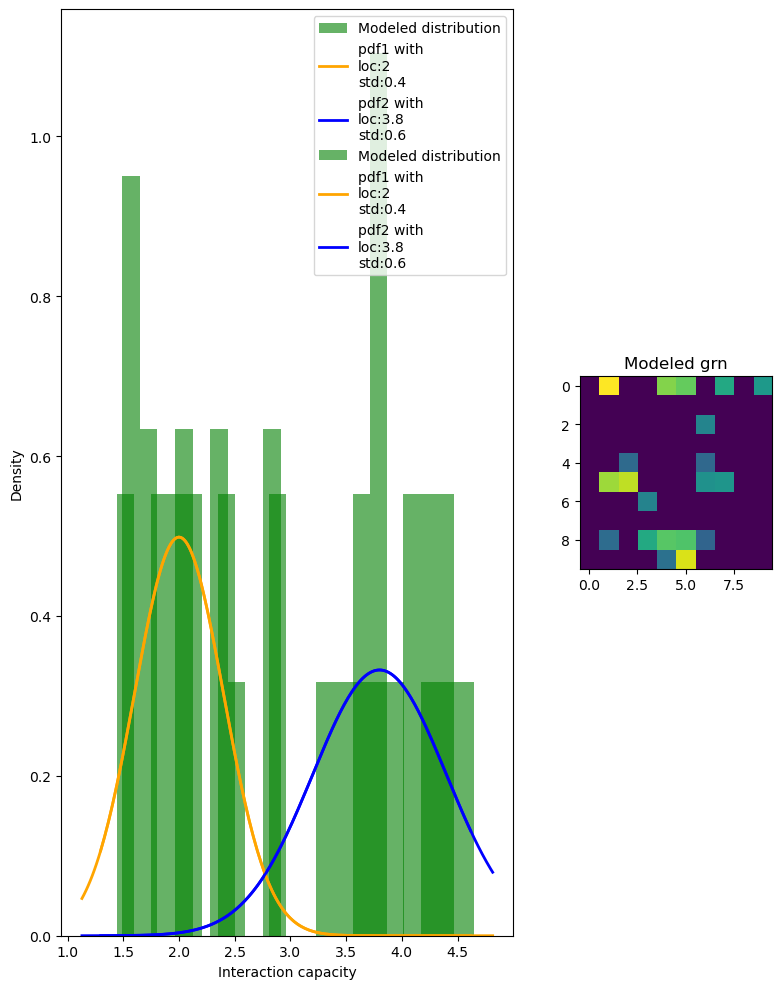

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
from scipy.stats import fit
from make_data import generate_grn


In [2]:
scMS_path = Path("../scMultiSim_data/old_data/run_04")
standard_grn_path = scMS_path/"geff.csv"
grn = pd.read_csv(standard_grn_path, index_col=0)[:-10]

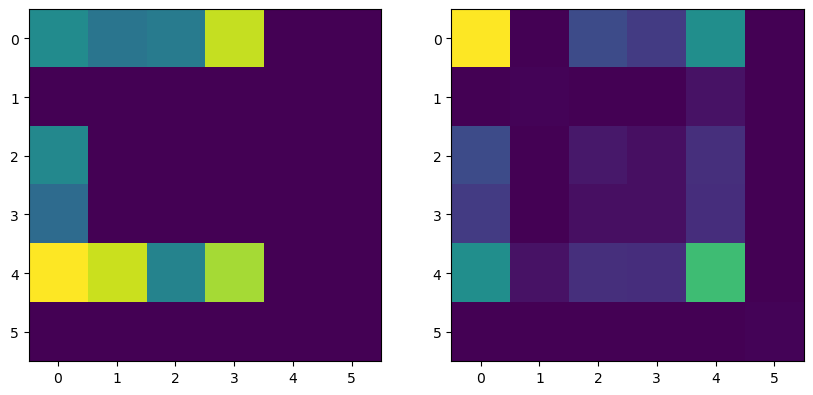

In [13]:
import torch
from torch.distributions import PositiveDefiniteTransform
plt.subplot(1, 2, 1)
plt.imshow(grn[:6])
plt.subplot(1, 2, 2)
plt.imshow(PositiveDefiniteTransform()(torch.tensor(grn[:6].to_numpy())))

/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Run id: data_run001
 Output path: data_run001
TFs are ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Using supplied standard grn
Gt sparsity: 0.7833333333333333
Connectivities:
[[False False False False False False False False  True False]
 [False False  True False False False False False False False]
 [ True False False  True False  True False False False False]
 [False False False False False  True False  True False False]
 [ True False False False False False False  True False  True]
 [False False False  True False False False False False  True]
 [ True False  True False  True False False False  True False]
 [ True False  True False False False False False False False]
 [False  True  True False False False False  True False False]
 [False False False False False False False False  True False]]
B:
[[ 1.          0.          0.          0.          0.          0.
   0.          0.         -3.08175657  0.        ]
 [ 0.          1.         -3.95420655  0.          0.          0.
 

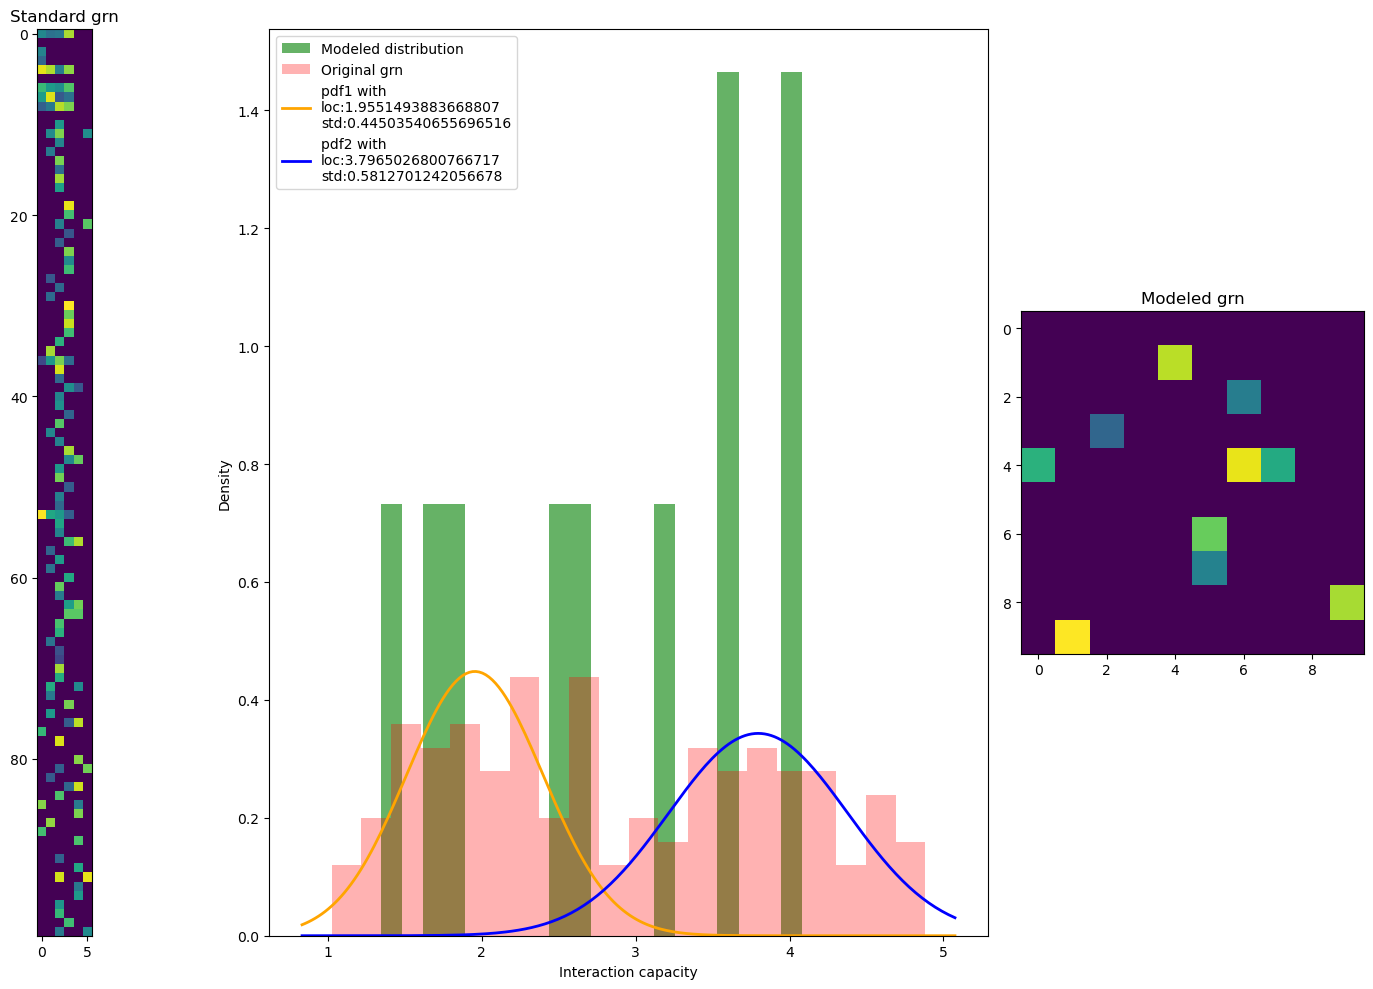

In [3]:
new_grn, params = generate_grn(
    n_genes=10,
    fit_to_standard=True,
    standard_grn_path= standard_grn_path,
    clip_standard=10,
    distribute_TFs=False,
    eigenvalues=True,
    verbose= True,
    out_path=Path("./")
    )

In [4]:
for n in range(10):
    if np.sum(np.append(new_grn[n], new_grn[:,n])) == 0:
        print("Noooo")

In [6]:
loc1= params['loc1']
std1 =params['std1']
loc2 =params['loc2']
std2 =params['std2']
sparsity =params['sparsity']
#connectivity_dist = params["connectivity_dist"]
grn_sim_params = [(loc1,std1),(loc2,std2)]


In [12]:
new_grn, params = generate_grn(
    n_genes=14,
    grn_sim_params=[(2,0.4),(3.8,0.6)],
    sparsity=0.7,
    distribute_TFs=False,
    eigenvalues=True,
    verbose= False,
    out_path=Path("./")
    )

Run id: data_run003
 Output path: data_run003
TFs are ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
Using supplied parameters


KeyboardInterrupt: 

In [9]:
print(new_grn)
print(params)

           1         2         3         4         5         6         7  \
1   4.505867  0.580235  0.110577  1.820509  2.261346  0.210917  0.215016   
2   0.127903  3.033476  2.335726  1.692915  0.098358  0.045326  0.031258   
3   0.517677  0.545064  2.865898  0.233723  0.186589  0.291057  0.273249   
4   4.418786  0.346983  4.566325  3.030958  0.447049  3.512583  2.121423   
5   0.547836  0.509848  0.241541  0.477615  3.750295  0.131398  0.592954   
6   4.295728  0.310837  4.716138  0.194770  4.132226  4.087988  2.081849   
7   0.240055  0.527734  0.052500  0.478489  3.879099  0.623381  0.434233   
8   0.156559  0.592349  1.740618  0.569682  5.258977  0.098173  0.553436   
9   0.053391  0.328848  2.151668  1.636618  0.055623  0.213680  0.581922   
10  0.131449  0.507062  0.550053  4.053998  1.853627  0.472781  0.127594   

           8         9        10  
1   0.333298  1.178603  3.972964  
2   3.483446  0.029506  0.584450  
3   0.491061  0.400279  0.565063  
4   2.958573  0.489605 

([<matplotlib.axis.XTick at 0x7f0a3df363d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

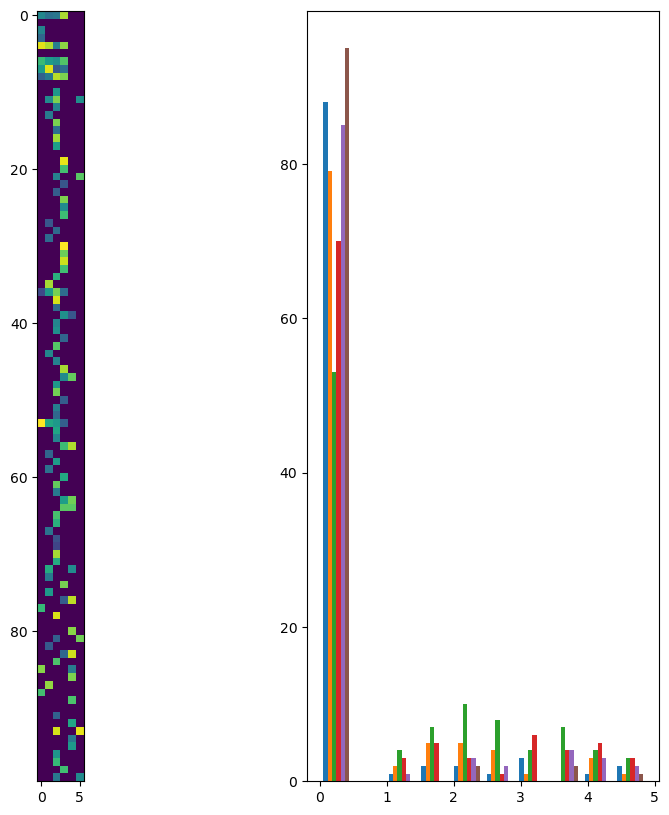

In [4]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.subplot(1,2,1)
plt.imshow(grn)
plt.subplot(1,2,2)
plt.hist(grn)
plt.xticks(np.arange(0, 6))

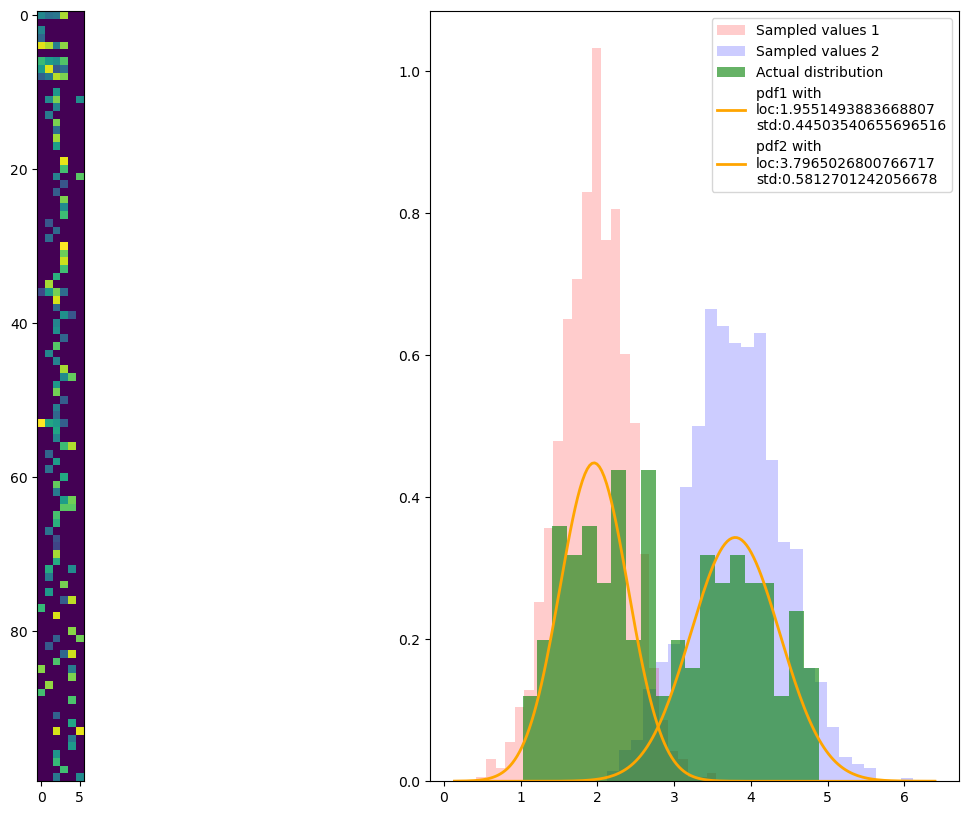

In [5]:
def plot_dist(grn):
    values = grn.flatten()
    values = np.sort(values[values!=0])
    values1= values[:len(values)//2]
    values2= values[len(values)//2:]

    loc1, std1 = norm.fit(values1)
    loc2, std2= norm.fit(values2)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    ax[0].imshow(grn)
    ax[1].hist(np.random.normal(loc=loc1, scale=std1, size=len(values)*10), bins=25, alpha=0.2, color="red", density=True, label="Sampled values 1")
    ax[1].hist(np.random.normal(loc=loc2, scale=std2, size=len(values)*10), bins=25, alpha=0.2, color="blue", density=True, label="Sampled values 2")
    ax[1].hist(values, bins=20, color="green", density=True, alpha = 0.6, label="Actual distribution")
    xmin, xmax = ax[1].get_xlim()
    x = np.linspace(xmin, xmax, 200)
    pdf1 = norm.pdf(x, loc1, std1)
    pdf2 = norm.pdf(x, loc2, std2)
    ax[1].plot(x, pdf1/2, label=f"pdf1 with\nloc:{loc1}\nstd:{std1}", color = "orange", linewidth = 2)
    ax[1].plot(x, pdf2/2, label=f"pdf2 with\nloc:{loc2}\nstd:{std2}", color = "orange", linewidth = 2)
    ax[1].legend()
    return fig, loc1, std1, loc2, std2
fig, loc1, std1, loc2, std2 =plot_dist(grn.to_numpy())

134
form sparsity:  0.7766666666666666
grn sparsity:  0.7833333333333333


/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


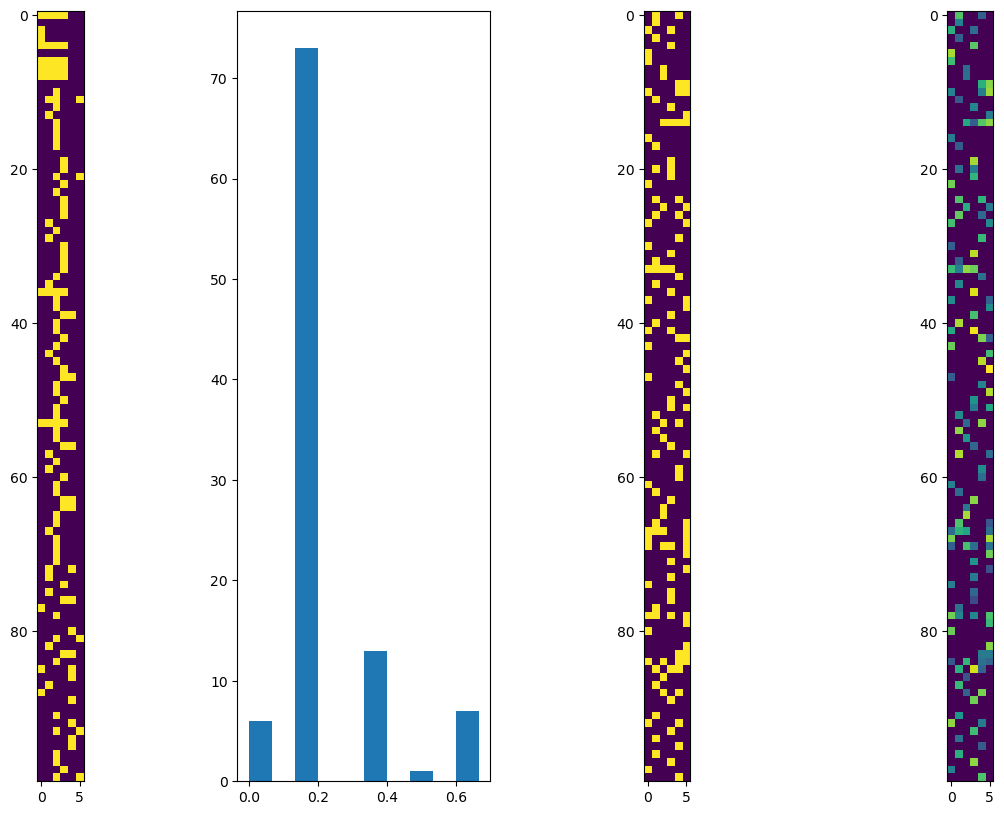

In [ ]:
shape=(100, 6)
# also fit connectivity distribution
con = np.sum(grn>0, axis=1)/grn.shape[1]
val, counts = np.unique(con, return_counts=True)
counts = counts / np.sum(counts)
success = False
while not success:
    connectivities = np.random.choice(val, size=shape[0], replace=True, p=counts)
    connectivities *= shape[1]
    connectivities =np.round(connectivities).astype(int)
    if np.sum(connectivities, axis = None) % 2 == 0:
        success = True
form = np.empty(shape)
for n, con in enumerate(connectivities):
    row = np.append(np.ones(con), np.zeros(shape[1]-con))
    np.random.shuffle(row)
    form[n] = row
n = np.sum(form>0, axis=None)
values1 = np.random.normal(loc=loc1, scale=std1, size=n//2)
values2 = np.random.normal(loc=loc2, scale=std2, size=n//2)
values = np.append(values1, values2)
np.random.shuffle(values)
form[form>0] = values[values>0]

In [151]:
grn.to_numpy()[grn>0]

array([2.2504838 , 1.82460703, 1.9416131 , 4.26881158, 2.1840705 ,
       1.63480702, 4.67788269, 4.30189336, 2.09047319, 4.04717444,
       3.30628504, 2.67396767, 2.41477955, 3.54815414, 2.70751027,
       4.65326338, 1.35797993, 1.82930432, 1.50143004, 1.97064851,
       4.35926154, 3.91531848, 2.63505344, 2.36181733, 3.93906484,
       2.38657819, 2.21637399, 2.01132553, 3.89141186, 1.76869918,
       4.18304931, 2.73966016, 4.72870807, 3.41494526, 2.14390956,
       3.63856658, 1.30750046, 1.44251569, 3.94333473, 2.35819671,
       3.34284321, 1.32225849, 1.67535983, 1.70606082, 4.86362697,
       3.77730523, 4.49642427, 3.37879171, 3.11574333, 4.22509492,
       1.06765023, 2.59420789, 3.88462589, 1.74398776, 4.58211307,
       1.69150421, 2.42281589, 1.32268872, 2.21456173, 2.4518156 ,
       1.59469307, 3.60025899, 2.25588937, 2.16991401, 4.23998188,
       2.31131645, 3.72132842, 2.60560143, 3.84998349, 1.43374167,
       2.11405339, 1.64201162, 4.88240162, 2.90256655, 2.63505

In [81]:
values = form

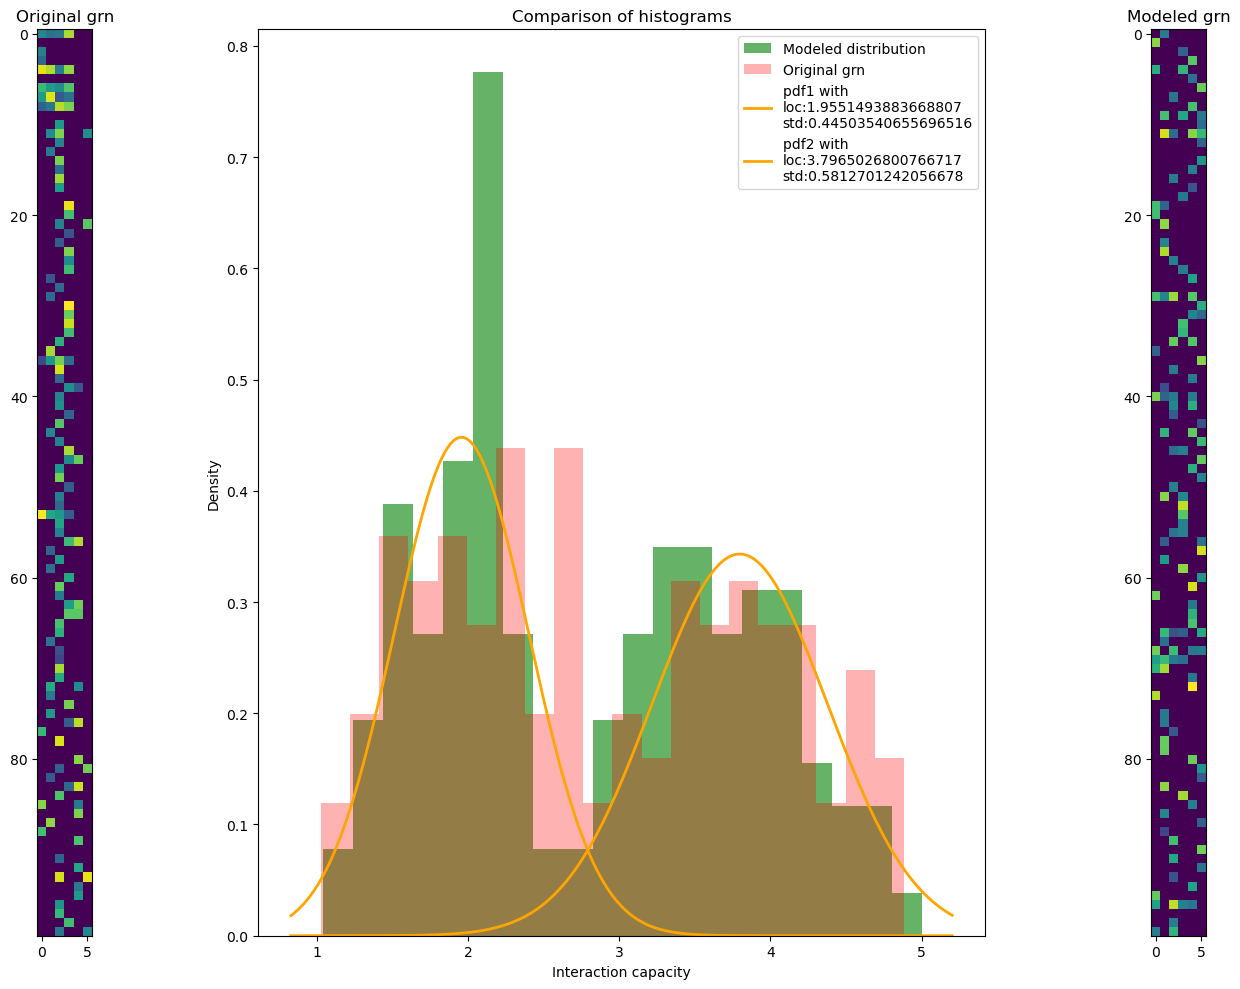

In [79]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.subplot(1,4,1)
plt.imshow(grn)
plt.title("Original grn")
plt.subplot(1,4,4)
plt.imshow(values)
plt.title("Modeled grn")
plt.subplot(1,4,(2,3))
plt.hist(values[values!=0].flatten(), bins=20, color="green", density=True, alpha = 0.6, label="Modeled distribution")
plt.hist(grn[grn!=0].to_numpy().flatten(), bins=20, color="red", density=True, alpha = 0.3, label="Original grn")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
pdf1 = norm.pdf(x, loc1, std1)
pdf2 = norm.pdf(x, loc2, std2)
plt.plot(x, pdf1/2, label=f"pdf1 with\nloc:{loc1}\nstd:{std1}", color = "orange", linewidth = 2)
plt.plot(x, pdf2/2, label=f"pdf2 with\nloc:{loc2}\nstd:{std2}", color = "orange", linewidth = 2)

plt.title("Comparison of histograms")
plt.ylabel("Density")
plt.xlabel("Interaction capacity")
plt.legend()
plt.tight_layout()
plt.savefig(f"/data/toulouse/bicycle/notebooks/experiments/masking/presentation/{shape[0]}gene{shape[1]}tfGRN.pdf")

In [62]:
new_grn=pd.DataFrame(values, columns=TFs, index=np.arange(1, len(values)+1))
params= np.empty((np.prod(new_grn.shape), 3))
n=0
for gene,row in new_grn.iterrows():
    for tf, effect in row.items():
        params[n] = [gene, tf, effect]
        n+=1
np.random.shuffle(params)
params = pd.DataFrame(params, columns=["regulated.gene","regulator.gene","regulator.effect"])
params["regulated.gene"] = params["regulated.gene"].astype(int)
params["regulator.gene"] = params["regulator.gene"].astype(int)
params=params.loc[params["regulator.effect"]!=0]
params = params[~params.drop(columns="regulator.effect").duplicated()]

params.index = np.arange(1, len(params)+1).astype(str)

import csv
new_grn.to_csv(f"{shape[0]}gene{shape[1]}tfGRN.csv")
params.to_csv(f"{shape[0]}gene{shape[1]}tfGRN_params.csv", quoting=csv.QUOTE_NONNUMERIC)


In [133]:
# perturb 2. tf
shape= (100, 10)
new_grn = pd.read_csv("100gene10tfGRN.csv", index_col=0)
pert_new_grn = new_grn
pert_new_grn.iloc[::,1] = pert_new_grn.iloc[::,1]*0.0001
params= np.empty((np.prod(new_grn.shape), 3))
n=0
for gene,row in new_grn.iterrows():
    for tf, effect in row.items():
        params[n] = [gene, tf, effect]
        n+=1
np.random.shuffle(params)
params = pd.DataFrame(params, columns=["regulated.gene","regulator.gene","regulator.effect"])
params["regulated.gene"] = params["regulated.gene"].astype(int)
params["regulator.gene"] = params["regulator.gene"].astype(int)
params=params.loc[params["regulator.effect"]!=0]
params = params[~params.drop(columns="regulator.effect").duplicated()]

params.index = np.arange(1, len(params)+1).astype(str)

import csv
new_grn.to_csv(f"{shape[0]}gene{shape[1]}tfGRN_perturbed.csv")
params.to_csv(f"{shape[0]}gene{shape[1]}tfGRN_params_perturbed.csv", quoting=csv.QUOTE_NONNUMERIC)


In [77]:
import pandas as pd
import numpy as np
shape=(100, 10)
TFs = np.arange(1,shape[1]+1)
n_samples = 10000
n_samples_pert = 2000
n_per_pert = n_samples_pert//shape[1]
kon_mod = pd.DataFrame(np.ones((n_samples, shape[1])), columns=TFs)
for n, tf in zip(range(n_samples-n_samples_pert, n_samples, n_per_pert), TFs):
    kon_mod.loc[n:(n+n_per_pert), tf] = 0
kon_mod.to_csv("cif_kon_mod.csv")
koff_mod = pd.DataFrame(np.zeros((n_samples, shape[1])), columns=TFs)
for n, tf in zip(range(n_samples-n_samples_pert, n_samples, n_per_pert), TFs):
    koff_mod.loc[n:(n+n_per_pert), tf] = -10
koff_mod.to_csv("cif_koff_mod.csv")


s_mod = pd.DataFrame(np.zeros((n_samples, shape[1])), columns=TFs)
for n, tf in zip(range(n_samples-n_samples_pert, n_samples, n_per_pert), TFs):
    s_mod.loc[n:(n+n_per_pert), tf] = -5
s_mod.to_csv("cif_s_mod.csv")


In [116]:
import pandas as pd
import numpy as np
shape=(110, 60)
target = 1
pert_cif = np.arange(shape[1])
kon_mod = pd.DataFrame(np.full(shape, 0))
#kon_mod.iloc[target, pert_cif] = np.full(len(pert_cif), -5)
kon_mod.to_csv("giv_kon_mod.csv")
koff_mod = pd.DataFrame(np.full(shape,0))
#koff_mod.iloc[target, pert_cif] = np.full(len(pert_cif), 5)

koff_mod.to_csv("giv_koff_mod.csv")


s_mod = pd.DataFrame(np.full((110, 50),0))
#s_mod.iloc[target] = np.full(50, -5)

s_mod.to_csv("giv_s_mod.csv")


In [117]:
import pandas as pd
import numpy as np
shape=(10000, 60)
target = 1
n_cifs = 50
pert_cif = np.arange(shape[1])

kon_mod = pd.DataFrame(np.full(shape, 0))
#kon_mod.iloc[::,n_cifs+target] = np.full(shape[0], -500)
kon_mod.to_csv("cif_kon_mod.csv")

koff_mod = pd.DataFrame(np.full(shape,0))
#koff_mod.iloc[::,n_cifs+target] = np.full(shape[0], +500)
koff_mod.to_csv("cif_koff_mod.csv")

s_mod = pd.DataFrame(np.full((shape[0], 50),0))
#s_mod.iloc[::,n_cifs+target] = np.full(shape[0], -5)
s_mod.to_csv("cif_s_mod.csv")


(array([0.20733798, 0.27645064, 0.69112659, 0.96757723, 1.72781649,
        1.03668989, 0.89846457, 0.48378862, 0.48378862, 0.13822532]),
 array([-0.6288559 , -0.4841646 , -0.33947331, -0.19478202, -0.05009073,
         0.09460057,  0.23929186,  0.38398315,  0.52867444,  0.67336573,
         0.81805703]),
 <BarContainer object of 10 artists>)

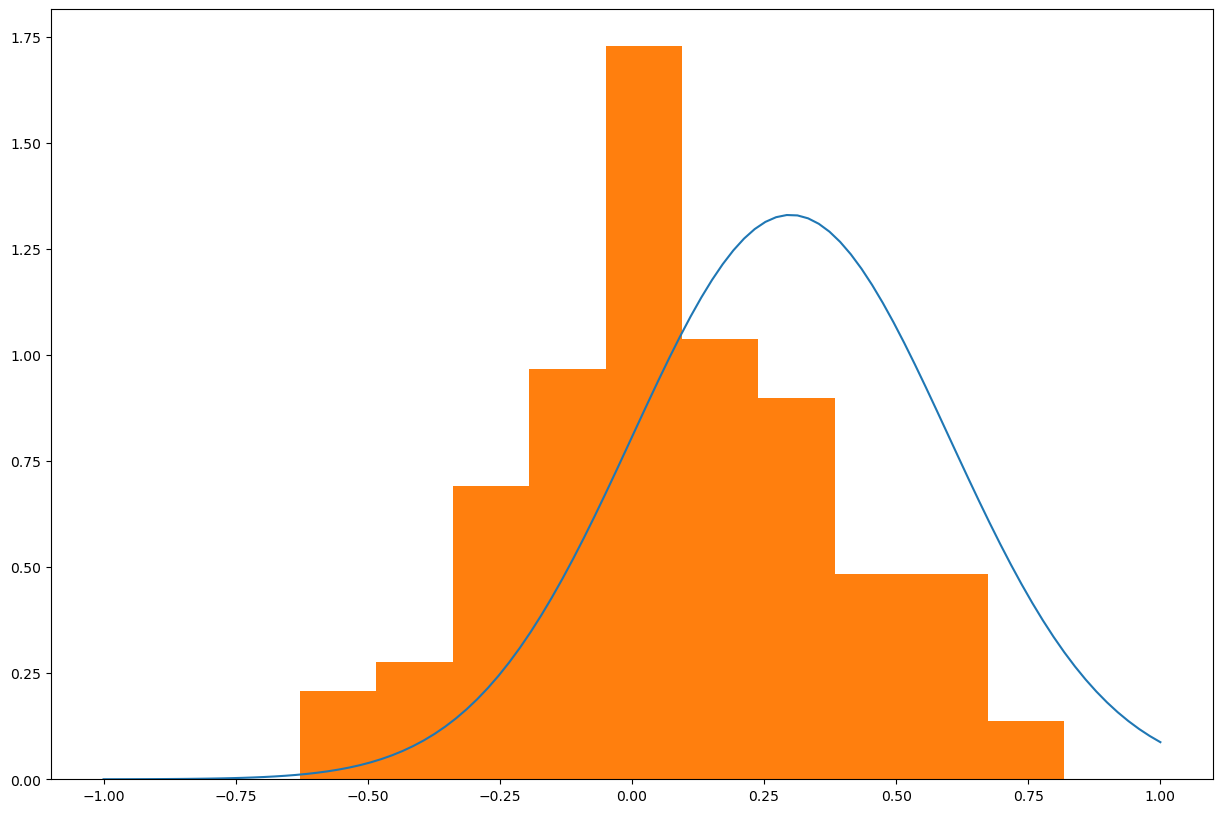

In [65]:
x = np.linspace(-1, 1, 100)
plt.plot(x,norm.pdf(x, loc=0.3, scale=0.3))
plt.hist(np.random.normal(loc=0.1, scale=0.3, size=len(x)), density=True)

In [26]:
success = False
while not success:
    success=True
    n = np.prod(shape)
    values1 = np.random.normal(loc=loc1, scale=std1, size=n//2)
    values2 = np.random.normal(loc=loc2, scale=std2, size=n//2)
    values = np.append(values1, values2)
    np.random.shuffle(values)
    values = values.reshape(shape)
    sparsity = np.sum(grn==0).sum()/np.prod(grn.shape)
    zeros = np.random.rand(*shape)<sparsity
    values[zeros] = 0
    TFs = np.arange(1, shape[1]+1)
    for n, row in enumerate(values[0:shape[1]]):
        # check for unregulated tfs and self regulating tfs
        if (row == np.zeros(shape[1])).all():
            success=False
            print("unsuccessful")
        if row[n]!=0:
            success=False
            print("unsuccessful")

unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful
unsuccessful

/data/toulouse/miniforge3/envs/bicycle/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [45]:
print("sparsity: ",np.sum(values==0).sum()/n)
TFs

sparsity:  7.98989898989899


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])